Read Data Set

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('waterQuality1.csv',encoding='latin1')

In [5]:
pd.unique(df['is_safe'])

array(['1', '0', '#NUM!'], dtype=object)

In [6]:
mean = df[df['ammonia'] != '#NUM!']['ammonia'].astype(float).mean()
df['ammonia'] = df['ammonia'].replace('#NUM!', mean)
df['is_safe'] = df['is_safe'].replace('#NUM!',1).fillna(0)

In [7]:
pd.unique(df['is_safe'])

array(['1', '0', 1], dtype=object)

In [8]:
df['ammonia'] = df['ammonia'].astype(float)
df['is_safe'] = df['is_safe'].astype(int)
df.describe()
pd.unique(df['is_safe'])

array([1, 0])

In [9]:
df['is_safe'].value_counts()

is_safe
0    7084
1     915
Name: count, dtype: int64

Split Dependent/Independent

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [11]:
x= df.iloc[:,0:-1].values
y= df.iloc[:,[-1]].values

In [12]:
y = y.reshape(len(y),)

Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)

Split Train Test

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=99) 

Klasifikasi KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

Training

In [16]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [17]:
# import pickle
# # Save the KNN model
# with open('knn_model.pkl', 'wb') as model_file:
#     pickle.dump(knn, model_file)

In [ ]:
import pickle
# Save the KNN model
with open('knn_model.sav', 'wb') as model_file:
    pickle.dump(knn, model_file)

Prediksi / Test

In [18]:
prediksi = knn.predict(x_test)
prediksi

array([0, 0, 0, ..., 0, 0, 0])

Cek Akurasi

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [20]:
print('Nilai akurasi', accuracy_score(y_test,prediksi))

Nilai akurasi 0.915


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1417
           1       0.74      0.39      0.51       183

    accuracy                           0.92      1600
   macro avg       0.83      0.69      0.73      1600
weighted avg       0.91      0.92      0.90      1600



<Axes: >

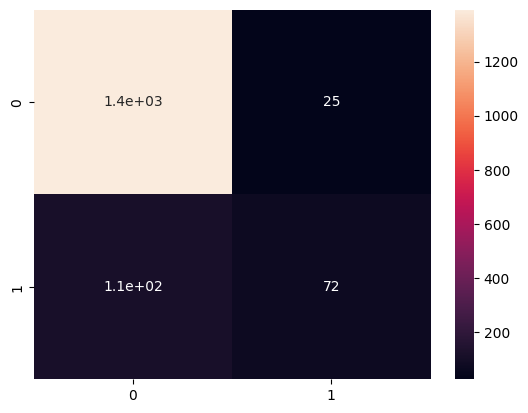

In [21]:
print(classification_report(y_test,prediksi))
sb.heatmap(confusion_matrix(y_test,prediksi),annot=True)

Mencari K yang terbaik 

In [22]:
n_akurasi =[]
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train,y_train)
    prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test,prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.84, 0.9025, 0.900625, 0.90875, 0.915, 0.90875, 0.91125, 0.909375, 0.909375, 0.906875, 0.90875, 0.904375, 0.909375, 0.905, 0.91, 0.904375, 0.908125, 0.906875, 0.910625, 0.90625, 0.906875, 0.90625, 0.908125, 0.904375, 0.906875, 0.905, 0.90625, 0.905625, 0.906875]


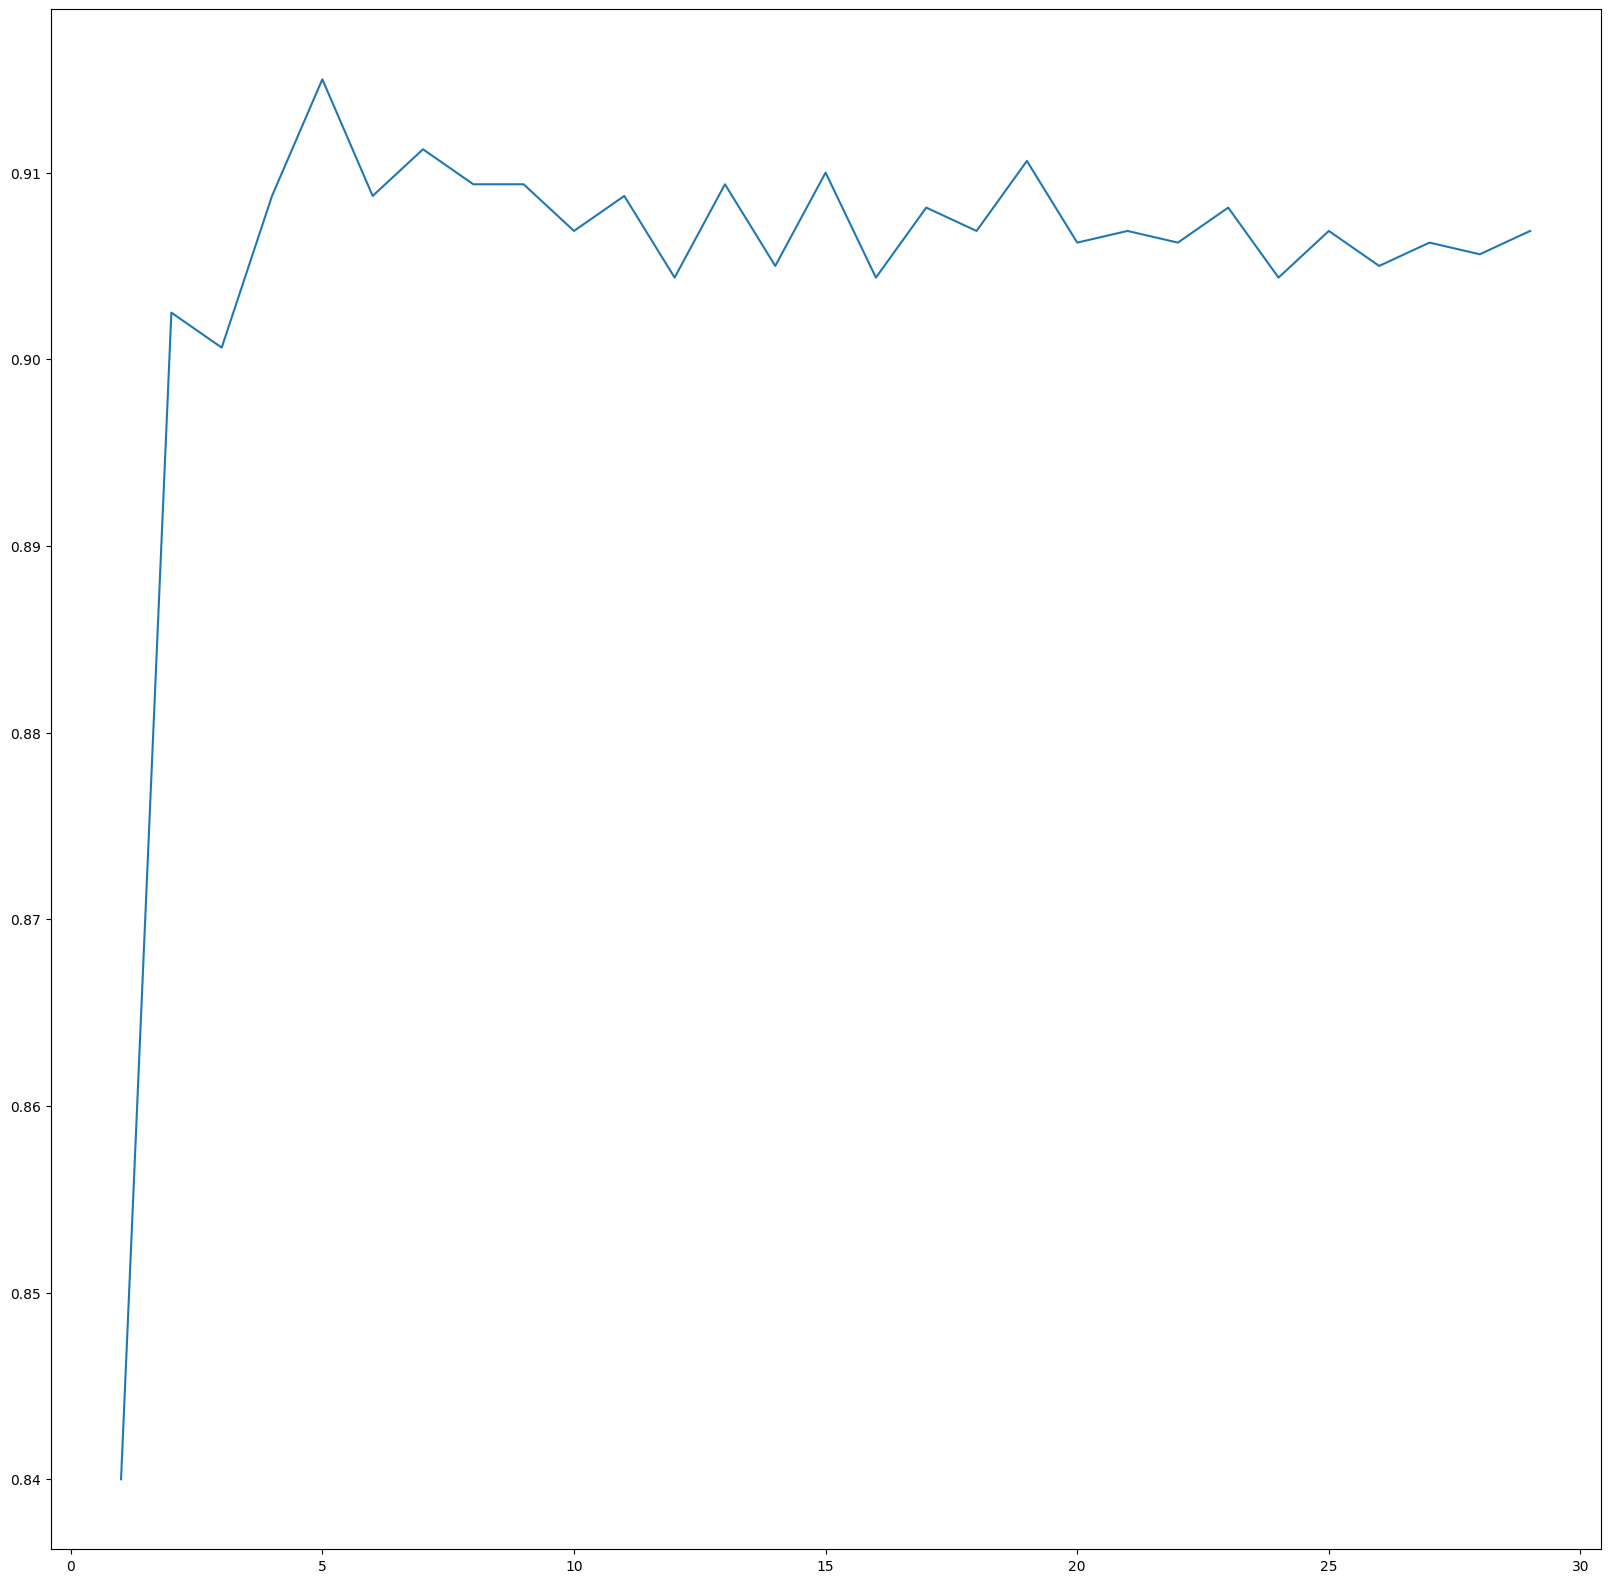

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(range(1,30),n_akurasi)
plt.show()

Klasifikasi Data Baru

In [24]:
databaru = pd.read_csv('databaru.csv')
new_data = databaru.iloc[:,:].values

new_pred = knn.predict(new_data)
print("Hasil Prediksi:\n")
for i, y_pred in enumerate(new_pred, start=1):
    new_data_row = new_data[i-1]
    print(f"Data Baru ke-{i}:{new_data_row.tolist()} = {y_pred}")  

Hasil Prediksi:

Data Baru ke-1:[2.65, 40.08, 0.8, 5.85, 0.107, 10.35, 0.3, 0.111, 1.28, 0.35, 0.0, 0.054, 16.08, 1.74, 0.009, 39.4, 3.19, 0.09, 0.04, 0.06] = 0
Data Baru ke-2:[2.34, 28.84, 0.04, 0.52, 0.002, 5.38, 0.85, 1.59, 0.45, 0.65, 0.008, 0.141, 6.48, 1.25, 0.005, 58.15, 3.21, 0.08, 0.27, 0.05] = 0
Data Baru ke-3:[1.01, 14.02, 0.04, 0.58, 0.008, 4.24, 0.53, 0.02, 0.52, 0.05, 0.003, 0.078, 14.16, 1.19, 0.001, 50.28, 1.74, 0.07, 0.44, 0.05] = 0
Data Baru ke-4:[0.42, 11.33, 0.01, 2.96, 0.005, 7.23, 0.03, 1.66, 0.02, 0.71, 0.71, 0.016, 1.41, 1.55, 0.001, 43.09, 0.9, 0.02, 0.45, 0.04] = 0
Data Baru ke-5:[0.77, 24.33, 0.05, 0.2, 0.006, 2.67, 0.69, 0.57, 0.14, 0.13, 0.001, 0.117, 6.74, 1.0, 0.004, 36.52, 3.22, 0.02, 0.44, 0.08] = 0
Data Baru ke-6:[0.6, 18.64, 0.001, 2.88, 0.004, 0.8, 0.43, 1.38, 0.2, 0.67, 0.67, 0.135, 9.75, 1.27, 0.008, 24.84, 7.99, 0.08, 0.3, 0.05] = 0
Data Baru ke-7:[0.58, 10.15, 0.02, 1.35, 0.002, 1.28, 0.62, 1.88, 0.32, 0.13, 0.007, 0.021, 18.6, 1.86, 0.009, 0.73,